In [9]:
weeks = [f"Week {n}" for n in range(1,55)]
from GSHEETS import *
import xlsxwriter
import numpy as np

#dataset = pd.ExcelWriter("Output/CreditData.xlsx",engine = "xlsxwriter")
cred  = "credentials.json"
wks = authenticate(cred)
client = authenticater(cred)
key_cs = "1gV25QiySiqVtv5Q1_tzgy0TiKS3_-ZGGEeUVEiG3g0I"

countries_consol = {
    "Kenya":["1_lDRhN_g9PJRG9YQhAn7fSC6XzSrajRVXWlPytYb8og",0.0080],
    "Nigeria":["1Nxkpt7cxTHSm7LHDzWUTSoYInT3YQFwIMRr5phVN4os",0.0022],
    "Ethiopia": ["1f3Pe_K4IDMgCYExNAp9KiLSZvTsWKCbqatpI1tesWAA",0.019],
    "Colombia":["13TOtUzGhRCOIqS4yBgJw9u08k2OmpNaUgeeERIM7zXc",0.00021],
    "Indonesia":["1-LsSYSgo4mDVrrpUfVRIfUhl6Afoce8LphKCgPY65h0",0.000066],
   "Fiji":["1j3jXTqteSn3uF1BUMI4Rq5-w9ZNY-dcR--B5uBfuCn8",0.4485]
    }
countries_weekly = {
    "Kenya":["1R_BRst1ok7bav9UKgTWyz28Kk60gCVyy5TuPLO0pn0U",0.0083],
    "Nigeria":["1udGFOaTk3cKk2Xoc1onsui45COIPt2rNCDkZEzxCZW4",0.0022],
    "Ethiopia": ["1xW54KK70LjuetIr0-2z9cvxDqZw40G5JyEm6_uWRqyM",0.019],
    "Colombia":["1iM_EHdzv4xr-cfZXgVY8oEfUd7BSUVuxgjbvF25rBbY",0.00021],
    "Indonesia":["1IXFi9IxwVNzOlf2B1JFrymf6IFofwMUvogkE5cuXNrs",0.000066],
    "Fiji": ["1Y1GQMJMgOSANo2uD3J8nbq_oJiTxwxOcl0CrzCbTIgQ",0.4485]
    }

Surveys={
    "Kenya": "1Ifuoh77Dqqvzm6KJ-AtMSFCDYWXAFz-jheCMyFZQ0T8",
    "Nigeria":"1-IeLC87XXI34whlAIaRM0S7EiGDG6RQhqpMFtr6XuqA",
    "Indonesia":"1otMrboci0ZqAQiFe57DQ9tuLDIwYVNfuz_8YaXTzZRs",
    "Ethiopia":"1cUREwZjTEqeC2WiaxgLZPLgiwUo-rDA_UPdtfp-8iL0",
    "Colombia":"1t7mMXZ2CXoNqXSErsjFYesX5aqBRw_FFui80BBQ2wJo",
    "Fiji":"1H6c0S86qfDnXeharksuRthbtAi-PEz4E8ANHzIfPAFA"
    }
init()



In [10]:
# extract and combine all the consolidated datasets
key = countries_weekly["Kenya"][0]
data_acc = reader("Income sources",wks,key)
data_trans= reader("Income reports",wks,key)

The read data:Income sources has shape ----------->(210, 29)
The read data:Income reports has shape ----------->(33993, 71)


In [12]:
data_acc.to_excel('Outputs/accounts.xlsx')
data_trans.to_excel('Outputs/trans.xlsx')

In [27]:
data_acc.columns
x= data_acc[['firm_id','Income source name', 'Income source type','Income source sub-type']]
x.columns =['firm_id','name','type','subtype']
x.head(2)

,firm_id,name,type,subtype
0,NA-OT-N3-1489,Income Source 1,Business,F - Garments production LM
1,NA-OT-N3-1487,Income Source 1,Business,AT - Wholesale selling


In [25]:
data_trans.columns
y= data_trans[['firm_id','Income report income source name', 'Income report amount']]
y.columns =['firm_id','name','amount']
y.head(3)

,firm_id,name,amount
0,NA-OT-N3-1489,Income Source 1,20000.0
1,NA-OT-N3-1489,Income Source 1,23500.0
2,NA-OT-N3-1489,Income Source 1,33200.0


In [33]:
y1 = y.merge(x,on = ["firm_id","name"])
y2 = y1.groupby(['firm_id','subtype'])['amount'].agg('sum').reset_index()
y2.head()

,firm_id,subtype,amount
0,KS-KB-K3-1052,DD - Construction material production LM,4918170.0
1,KS-KB-K3-1095,G - Food preparation AP,12670.0
2,KS-KB-K3-1133,U - Repair maintenance services OT,205820.0
3,KS-KB-K3-1226,D - Metal works LM,485930.0
4,KS-KB-K3-1352,AD - Printing / photocopying OT,220680.0


In [38]:
import networkx as nx
import matplotlib.pyplot as plt
graph = nx.Graph()

ModuleNotFoundError: No module named 'matplotlib'

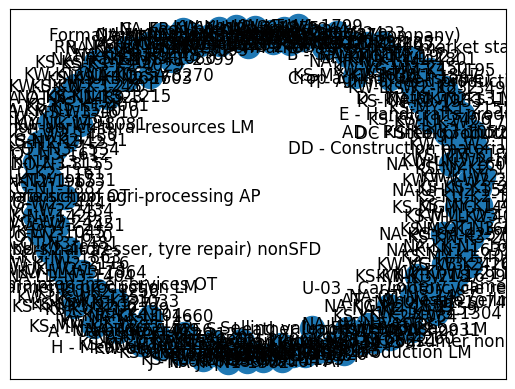

In [39]:
dy = list(y2["firm_id"])+list(y2['subtype'])
graph.add_nodes_from(dy)
nx.draw_networkx(graph)

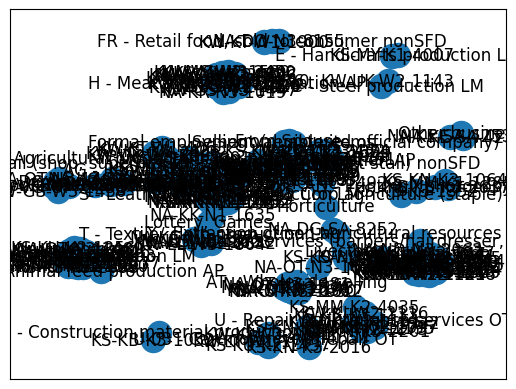

In [43]:
x1 = []
for i,j in zip(y2['firm_id'],y2["subtype"]):
    x1.append((i,j))
graph.add_edges_from(x1)
nx.draw_networkx(graph)